### Dependencies

In [2]:
!pip install matplotlib tensorflow tensorflow-gpu tensorflow-io

In [1]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

### Data Loading

In [2]:
CAPUCHIN_FILE= os.path.join('data', 'Parsed_Capuchinbird_Clips', 'XC3776-3.wav')
NOT_CAPUCHIN_FILE= os.path.join('data', 'Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav')

In [3]:
file_contents= tf.io.read_file(CAPUCHIN_FILE)

In [4]:
wav, sample_rate= tf.audio.decode_wav(file_contents, desired_channels= 1)

In [5]:
wav

<tf.Tensor: shape=(132300, 1), dtype=float32, numpy=
array([[-0.11117554],
       [-0.0378418 ],
       [ 0.05856323],
       ...,
       [-0.01077271],
       [-0.03436279],
       [-0.04879761]], dtype=float32)>

In [6]:
sample_rate

<tf.Tensor: shape=(), dtype=int32, numpy=44100>

In [7]:
def load_wav_16k_mono(filename):
    file_contents= tf.io.read_file(filename)
    
    wav, sample_rate= tf.audio.decode_wav(file_contents, desired_channels= 1)
    wav= tf.squeeze(wav, axis= -1)
    sample_rate= tf.cast(sample_rate, dtype=tf.int64)
    
    wav= tfio.audio.resample(wav, rate_in= sample_rate, rate_out= 16000)
    
    return wav

In [8]:
wave= load_wav_16k_mono(CAPUCHIN_FILE)
nwave= load_wav_16k_mono(NOT_CAPUCHIN_FILE)

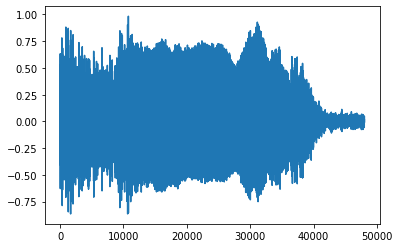

In [9]:
plt.plot(wave)
plt.show()

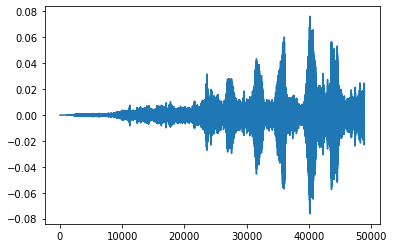

In [10]:
plt.plot(nwave)
plt.show()

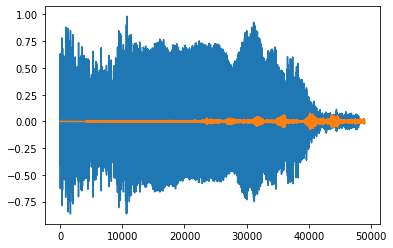

In [11]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

In [12]:
POS= os.path.join('data', 'Parsed_Capuchinbird_Clips')
NEG= os.path.join('data', 'Parsed_Not_Capuchinbird_Clips')

In [13]:
pos= tf.data.Dataset.list_files(POS+'\*.wav')
neg= tf.data.Dataset.list_files(NEG+'\*.wav')

In [14]:
len(pos), len(neg)


(217, 593)

In [15]:
tf.ones(len(pos))

<tf.Tensor: shape=(217,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [16]:
tf.zeros(len(neg))

<tf.Tensor: shape=(593,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [17]:
pos.as_numpy_iterator().next()

b'data\\Parsed_Capuchinbird_Clips\\XC178168-3.wav'

In [18]:
positives= tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives= tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))

data= positives.concatenate(negatives)

In [19]:
data.shuffle(10000).as_numpy_iterator().next()

(b'data\\Parsed_Not_Capuchinbird_Clips\\crickets-chirping-crickets-sound-27.wav',
 0.0)

In [20]:
lengths= []
for file in os.listdir(os.path.join('data', 'Parsed_Capuchinbird_Clips')):
    tensor_wave= load_wav_16k_mono(os.path.join('data', 'Parsed_Capuchinbird_Clips', file))
    lengths.append(len(tensor_wave))


In [21]:
lengths[:10]

[40000, 48000, 56000, 48000, 56000, 64000, 64000, 64000, 56000, 56000]

In [22]:
mean= tf.math.reduce_mean(lengths)
min= tf.math.reduce_min(lengths)
max= tf.math.reduce_max(lengths)

In [23]:
mean, min, max

(<tf.Tensor: shape=(), dtype=int32, numpy=54156>,
 <tf.Tensor: shape=(), dtype=int32, numpy=32000>,
 <tf.Tensor: shape=(), dtype=int32, numpy=80000>)

In [24]:
def preprocess(file_path, label):
    wav= load_wav_16k_mono(file_path)
    wav= wav[:48000]
    zero_padding= tf.zeros([48000]- tf.shape(wav), dtype= tf.float32)
    wav= tf.concat([zero_padding, wav], 0)
    
    spectrogram= tf.signal.stft(wav, frame_length= 320, frame_step= 32)
    spectrogram= tf.abs(spectrogram)
    spectrogram= tf.expand_dims(spectrogram, axis= 2)
    
    return spectrogram, label

In [25]:
file_path, label= positives.shuffle(buffer_size= 10000).as_numpy_iterator().next()

In [26]:
spectrogram, label= preprocess(file_path, label)

In [27]:
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       ...,

       [[3.4047730e-02],
        [3.1229634e-02],
        [3.8121101e-02],
        ...,
        [2.8812696e-07],
        [3.1764142e-07],
        [2.9243529e-07]],

       [[2.2530884e-02],
        [2.1241199e-02],
        [2.0391349e-02],
        ...,
        [4.3568735e-07],
        [3.9645255e-07],
        [1.6391277e-07]],

       [[1.0637306e-02],
        [8.4740259e-03],
        [5.8991811e-03],
        ...,
        [7.1185252

In [28]:
label

1.0

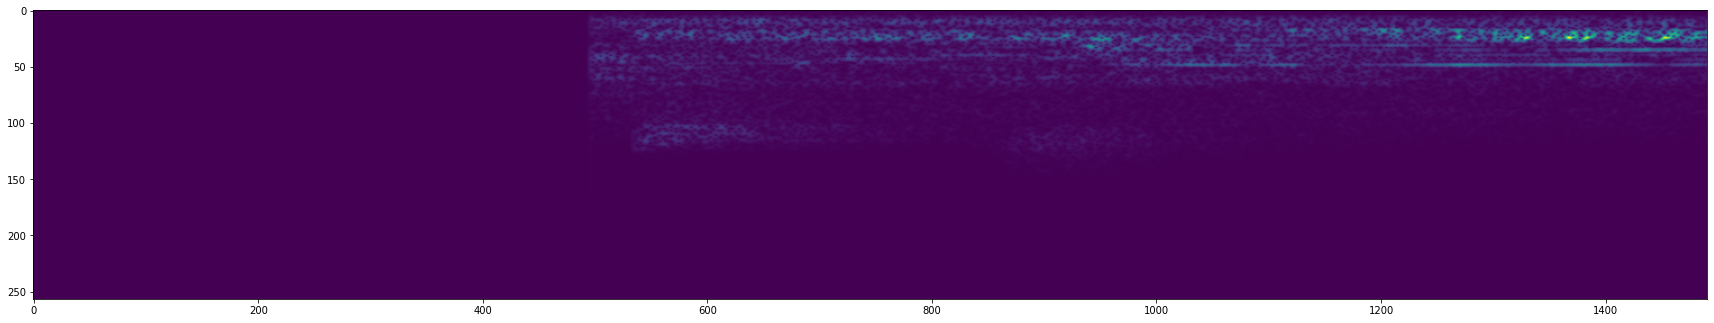

In [29]:
plt.figure(figsize= (30, 20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [30]:
data= data.map(preprocess)
data= data.cache()
data= data.shuffle(buffer_size= 1000)
data= data.batch(16)
data= data.prefetch(8)

In [31]:
len(data)

51

In [32]:
train= data.take(36)
test= data.skip(36).take(15)

In [33]:
samples, labels= train.as_numpy_iterator().next()
samples.shape

(16, 1491, 257, 1)

In [34]:
labels

array([0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

In [36]:
model= Sequential()
model.add(Conv2D(16, (3, 3), activation= 'relu', input_shape= (1491, 257, 1)))
model.add(Conv2D(16, (3, 3), activation= 'relu'))
model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

In [37]:
model.compile('Adam', loss= 'BinaryCrossentropy', metrics= [tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 16)     160       
                                                                 
 conv2d_1 (Conv2D)           (None, 1487, 253, 16)     2320      
                                                                 
 flatten (Flatten)           (None, 6019376)           0         
                                                                 
 dense (Dense)               (None, 128)               770480256 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 770,482,865
Trainable params: 770,482,865
Non-trainable params: 0
_________________________________________________________________


In [38]:
hist= model.fit(train, epochs= 2, validation_data= test)

Epoch 1/2
36/36 [==============================] - 816s 23s/step - loss: 13.7638 - recall: 0.9085 - precision: 0.8165 - val_loss: 0.6470 - val_recall: 0.8308 - val_precision: 0.9818
Epoch 2/2
36/36 [==============================] - 788s 21s/step - loss: 0.0566 - recall: 0.9728 - precision: 0.9795 - val_loss: 0.0423 - val_recall: 0.9855 - val_precision: 0.9855


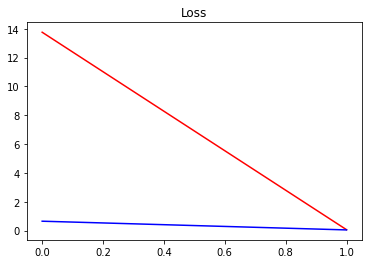

In [39]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

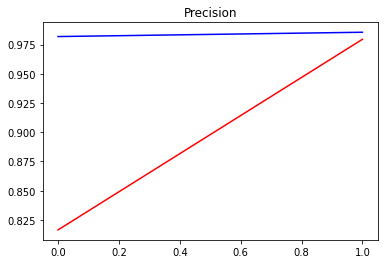

In [40]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

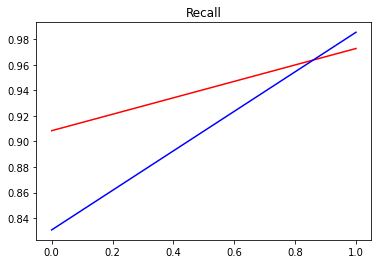

In [41]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

In [47]:
X_test, y_test= test.as_numpy_iterator().next()

In [48]:
X_test.shape, y_test.shape

((16, 1491, 257, 1), (16,))

In [49]:
yhat= model.predict(X_test)

1/1 [==============================] - 1s 971ms/step


In [50]:
yhat= [1 if prediction> 0.5 else 0 for prediction in yhat]

In [51]:
yhat

[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]

In [52]:
y_test.astype(int)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [53]:
def load_mp3_16k_mono(filename):
    """" wav file-> float tensor-> resample to single-channel audio """
    res= tfio.audio.AudioIOTensor(filename)

    tensor= res.to_tensor()
    tensor= tf.math.reduce_sum(tensor, axis= 1)/ 2 

    sample_rate= res.rate
    sample_rate= tf.cast(sample_rate, dtype= tf.int64)

    wav= tfio.audio.resample(tensor, rate_in= sample_rate, rate_out= 16000)
    return wav


In [54]:
mp3= os.path.join('data', 'Forest Recordings', 'recording_00.mp3')

In [55]:
wav= load_mp3_16k_mono(mp3)

In [56]:
wav

<tf.Tensor: shape=(2880666,), dtype=float32, numpy=
array([ 8.1433272e-12, -5.7019250e-12, -5.3486417e-12, ...,
       -1.1291276e-02, -1.4230422e-02, -3.0555837e-03], dtype=float32)>

In [57]:
audio_slices= tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length= 48000, sequence_stride= 48000, batch_size= 1)

In [59]:
samples, index= audio_slices.as_numpy_iterator().next()

In [60]:
samples.shape

(1, 48000)

In [61]:
len(audio_slices)

60

In [62]:
def preprocess_mp3(sample, index):
    sample= sample[0]
    zero_padding= tf.zeros([48000] - tf.shape(sample), dtype= tf.float32)
    wav= tf.concat([zero_padding, sample], 0)
    
    spectrogram= tf.signal.stft(wav, frame_length= 320, frame_step= 32)
    spectrogram= tf.abs(spectrogram)
    spectrogram= tf.expand_dims(spectrogram, axis= 2)
    return spectrogram

In [63]:
audio_slices= tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length= 48000, sequence_stride= 48000, batch_size= 1)
audio_slices= audio_slices.map(preprocess_mp3)
audio_slices= audio_slices.batch(64)

In [ ]:
yhat= model.predict(audio_slices)
yhat= [1 if prediction> 0.96 else 0 for prediction in yhat]

In [ ]:
len(yhat)

In [ ]:
yhat

In [ ]:
from itertools import groupby

In [ ]:
yhat= [key for key, group in groupby(yhat)]

In [ ]:
tf.math.reduce_sum(yhat)

In [ ]:
calls= tf.math.reduce_sum(yhat).numpy()
calls

In [ ]:
results= {}
for file in os.listdir(os.path.join('data', 'Forest Recordings')):
    FILEPATH= os.path.join('data', 'Forest Recordings', file)
    
    wav= load_mp3_16k_mono(FILEPATH)
    audio_slices= tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length= 48000, sequence_stride= 48000, batch_size= 1)
    audio_slices= audio_slices.map(preprocess_mp3)
    audio_slices= audio_slices.batch(64)
    
    yhat= model.predict(audio_slices)
    
    results[file]= yhat

In [ ]:
results

In [ ]:
class_preds= {}
for file, logits in results.items():
    class_preds[file]= [1 if prediction> 0.96 else 0 for prediction in logits]

class_preds

In [ ]:
postprocessed= {}
for file, scores in class_preds.items():
    postprocessed[file]= tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()

postprocessed

In [ ]:
import csv

In [ ]:
with open('density_results.csv', 'w', newline= '') as f:
    writer= csv.writer(f, delimiter= ',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key_value in postprocessed.items():
        writer.writerow([key, value])